# MovieLens-DDD Summary Statistics

This notebook demonstrates how to download and process the user interaction and work metadata tables for the ML/DDD dataset. It generates graphs to visualize trends in the Does the Dog Die warnings associated with the MovieLens dataset.

`ml-ddd_interaction_table.csv` is a subset of the ratings.csv file found in GroupLens's MovieLens25M dataset (https://grouplens.org/datasets/movielens/25m/). ml-ddd_interaction_table only contains interactions with movies that have associated warning labels on Does the Dog Die? (DDD) (https://www.doesthedogdie.com/). It is additionally filtered to contain users and movies with at least three interactions. 

`ml-ddd_sensitivity_table.csv` contains information about each movie in the interaction table such as its average rating, number of ratings, and hot-encoded columns for each warning. The DDD warning system allows users to vote on whether or not a movie contains a warning. As a result, we provide a Clear Yes, Clear No, Unclear, and No Votes column for each warning corresponding to the consensus of user votes.
- Clear Yes: at least 75% of the total votes are yes (i.e. warning is applicable)
- Clear No: at least 75% of the total votes are no (i.e. warning is not applicable)
- Unclear: neither yes or no votes surpass 75%
- No Votes: total number of votes is zero

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

try:
    plt.style.use("seaborn-v0_8-darkgrid")
except:
    plt.style.use("seaborn-darkgrid")
plt.rcParams.update({'font.size': 16})

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [5]:
interaction_table = pd.read_csv("data/ml-ddd_interaction_table.csv")
sensitivity_table = pd.read_csv("data/ml-ddd_sensitivity_table.csv")

## Interaction Summary

In [4]:
# Interactions per user
interactions = interaction_table.groupby('user_id')
print("max interactions per user: " + str(max(interactions.size())))
print("min interactions per user: " + str(min(interactions.size())))
print("mean interactions per user: " + str(np.mean(interactions.size())))
print("median interactions per user: " + str(np.median(interactions.size())))
print("std dev interactions per user: " + str(np.std(interactions.size())))
print("\n")

print("max ratings per work: " + str(max(sensitivity_table["n_ratings"])))
print("min ratings per work: " + str(min(sensitivity_table["n_ratings"])))
print("mean ratings per work: " + str(np.mean(sensitivity_table["n_ratings"])))
print("median ratings per work: " + str(np.median(sensitivity_table["n_ratings"])))
print("std dev ratings per work: " + str(np.std(sensitivity_table["n_ratings"])))
print("\n")

print("max av rating: " + str(max(sensitivity_table["av_rating"])))
print("min av rating: " + str(min(sensitivity_table["av_rating"])))
print("mean av rating: " + str(np.mean(sensitivity_table["av_rating"])))
print("median av rating: " + str(np.median(sensitivity_table["av_rating"])))
print("std dev av rating: " + str(np.std(sensitivity_table["av_rating"])))
print("\n")

print("Density: " + str(len(interaction_table) / (len(interaction_table['user_id'].unique()) * (len(sensitivity_table)))))

max interactions per user: 21030
min interactions per user: 9
mean interactions per user: 140.68863855888668
median interactions per user: 65.0
std dev interactions per user: 237.5653836935209


max ratings per work: 81491
min ratings per work: 3
mean ratings per work: 701.3762728499571
median ratings per work: 17.0
std dev ratings per work: 3151.719966709366


max av rating: 5.0
min av rating: 0.5
mean av rating: 3.109987747087192
median av rating: 3.1819925041401556
std dev av rating: 0.5748002368709251


Density: 0.004315072952977754


/Users/ameliakovacs/anaconda3/envs/surprise/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


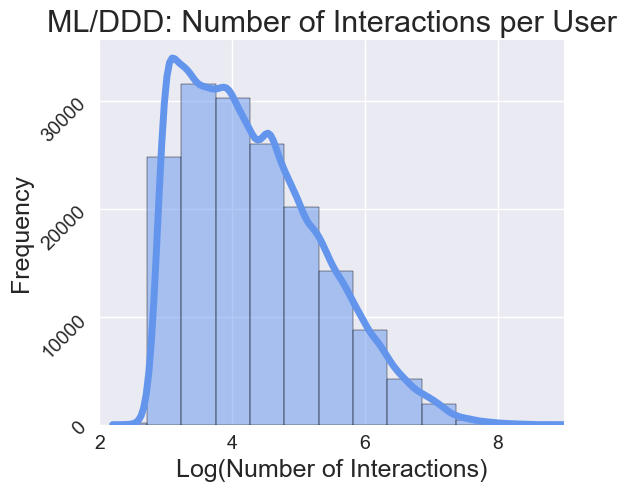

<Figure size 800x550 with 0 Axes>

In [131]:
interaction_counts = np.log(interaction_table.groupby('user_id').size())

fig, ax = plt.subplots(figsize=(6, 5))
sns.histplot(interaction_counts, bins=15, kde=True, color='cornflowerblue', line_kws={'lw':5}, edgecolor='black', ax=ax)

plt.xlabel('Log(Number of Interactions)', fontsize=18)
plt.xlim(2,9)
plt.xticks([2, 4, 6, 8], fontsize=14)
plt.yticks([0, 10000, 20000, 30000], fontsize=14, rotation=45)
plt.ylabel('Frequency', fontsize=18)
plt.title('ML/DDD: Number of Interactions per User', fontsize=22)
plt.show()

/Users/ameliakovacs/anaconda3/envs/surprise/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


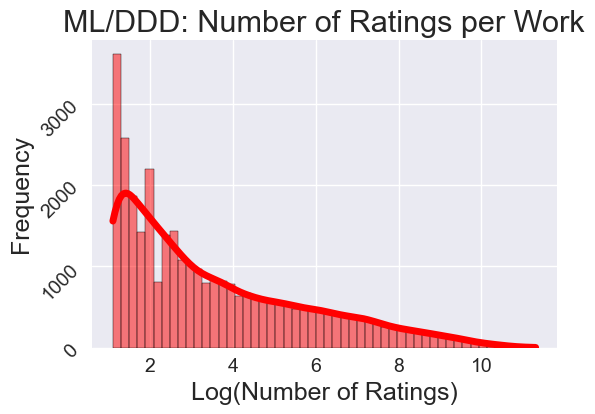

In [127]:
log_ratings = np.log(sensitivity_table['n_ratings'])

fig, ax = plt.subplots(figsize=(6, 4))
sns.histplot(data=log_ratings, kde=True, color='red', label='number of ratings', line_kws={'lw':5}, ax=ax)

plt.xlabel('Log(Number of Ratings)', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks([0, 1000, 2000, 3000], fontsize=14, rotation=45)
plt.title('ML/DDD: Number of Ratings per Work', fontsize=22)
plt.show()

/Users/ameliakovacs/anaconda3/envs/surprise/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


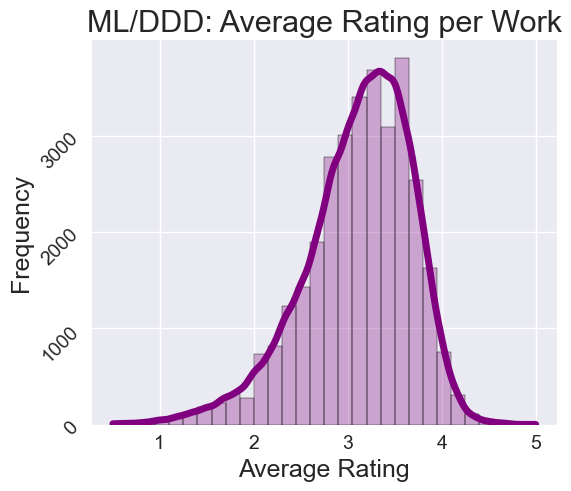

<Figure size 800x550 with 0 Axes>

In [132]:
fig, ax = plt.subplots(figsize=(6, 5))
sns.histplot(data=sensitivity_table, x='av_rating', kde=True, bins=30, color='purple', line_kws={'lw':5}, alpha=0.3, label='av rating', ax=ax)

plt.xlabel('Average Rating', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks([0, 1000, 2000, 3000], fontsize=14, rotation=45)
plt.title('ML/DDD: Average Rating per Work', fontsize=22)
plt.show()

/Users/ameliakovacs/anaconda3/envs/surprise/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ameliakovacs/anaconda3/envs/surprise/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


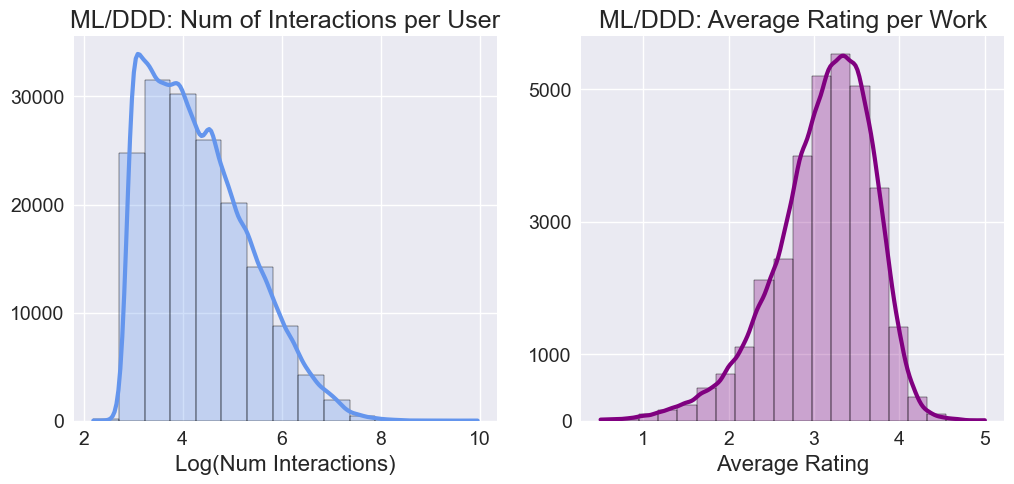

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(interaction_counts, bins=15, kde=True, color='cornflowerblue', line_kws={'lw':3}, alpha=0.3, ax=axes[0])
axes[0].set_xlabel('Log(Num Interactions)', fontsize=16)
# axes[0].set_xticks([2, 4, 6, 8, 10])
axes[0].tick_params(axis='x', labelsize=14)
axes[0].set_yticks([0, 10000, 20000, 30000])
axes[0].tick_params(axis='y', labelsize=14)
axes[0].set_ylabel("")
axes[0].set_title('ML/DDD: Num of Interactions per User', fontsize=18)

sns.histplot(data=sensitivity_table, x='av_rating', kde=True, color='purple', bins=20, line_kws={'lw':3}, alpha=0.3, ax=axes[1])
axes[1].set_xlabel('Average Rating', fontsize=16)
axes[1].tick_params(axis='x', labelsize=14)
axes[1].set_yticks([0, 1000, 3000, 5000])
axes[1].tick_params(axis='y', labelsize=14)
axes[1].set_ylabel("")
axes[1].set_title('ML/DDD: Average Rating per Work', fontsize=18)

plt.legend()
plt.show()

In [17]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

## Warning Summary

In [6]:
warnings = []
for warning in sensitivity_table.columns.to_list()[4:-1]:
    if warning[0:10] == "Clear Yes:":
        warnings.append(warning[11:])
print(f"There are {len(warnings)} warnings: ")
warnings

There are 136 warnings: 


['Does the dog die',
 'Are animals abused',
 'Does a pet die',
 'Is there dog fighting',
 'Are there bugs',
 'Is there a dead animal',
 'Does a dragon die',
 'Does a cat die',
 'Does an animal die',
 'Are there snakes',
 'Are there spiders',
 'Is a child abandoned by a parent',
 'Is someone gaslighted',
 'Does the abused become the abuser',
 'Is someone stalked',
 'Is a child abused',
 'Is there domestic violence',
 'Is there addiction',
 'Does someone use drugs',
 'Does someone abuse alcohol',
 'Is someone drugged',
 'Is someone restrained',
 'Is someone sexually assaulted',
 'Is someone raped onscreen',
 'Is there cannibalism',
 'Is there body horror',
 'Is there amputation',
 'Is there finger/toe mutilation',
 'Is someone crushed to death',
 'Is there Achilles Tendon injury',
 'Does a head get squashed',
 'Is someone burned alive',
 'Is someone buried alive',
 'Is there a hanging',
 'Is there eye mutilation',
 'Is someone tortured',
 'Is there excessive gore',
 'Is there shaving/cut

We will perform a permutation test to examine the following null hypothesis: the presence of a sensitivity label has no impact on work popularity. In other words, does the distribution of popularity for works marked with a sensitivity label match the distribution of popularity for works without the label?

The observed difference is the difference between the mean rating of works with a warning and what would be expected under the null hypothesis. Hence a positive difference implies works with the warning receive better ratings than expected. A p-value of less than 0.005 indicated the difference in distributions is statistically significant.

The warning_stats dataframe also contains other relevant information about the warnings, such as their prevalence in the dataset.

In [7]:
# Function to visualize the difference in distributions of average ratings for works marked Clear Yes vs Clear No for a warning
def warning_popularity_distribution(warning):
    fig, ax = plt.subplots(figsize=(6, 5))

    sns.histplot(data=sensitivity_table[sensitivity_table[f"Clear Yes: {warning}"] == 1]['av_rating'], bins=80, kde=True, stat='density', color='red', edgecolor="none", label=f'Av Rating for Works with \n{warning}', alpha=0.5, ax=ax)
    sns.histplot(data=sensitivity_table[sensitivity_table[f"Clear No: {warning}"] == 1]['av_rating'], bins=80, kde=True, stat='density', color='blue', edgecolor="none", label=f'Av Rating for Works without \n{warning}', alpha=0.5, ax=ax)

    plt.xlabel('Average Rating')
    plt.ylabel('Frequency')
    plt.title(f'ML/DDD: Work Popularity With Clear Yes vs Clear No \n {warning} Warnings')
    plt.legend(loc="upper left")
    plt.show()

def mean_difference(group1, group2):
    return np.mean(group1) - np.mean(group2)

# Performs permutation test: examines significance in the difference in Clear Yes vs Clear No distributions
def permutation_test(data, warning_column, target_column, num_permutations=1000):
    observed_difference = mean_difference(data[data[f"Clear Yes: {warning_column}"] == 1][target_column], data[data[f"Clear No: {warning_column}"] == 1][target_column])
    
    permutation_differences = []
    for _ in range(num_permutations):
        permuted_data = data[target_column].sample(frac=1, replace=False).reset_index(drop=True)
        permuted_difference = mean_difference(permuted_data[data[f"Clear Yes: {warning_column}"] == 1], permuted_data[data[f"Clear No: {warning_column}"] == 1])
        permutation_differences.append(permuted_difference)
    
    # Calculate p-value
    p_value = (np.abs(permutation_differences) >= np.abs(observed_difference)).mean()
    
    return observed_difference, p_value

In [8]:
warning_stats = []

for warning in warnings:
    n_works_clear_yes = len(sensitivity_table[sensitivity_table[f"Clear Yes: {warning}"] == True])
    n_works_clear_no = len(sensitivity_table[sensitivity_table[f"Clear No: {warning}"] == True])
    n_works_unclear = len(sensitivity_table[sensitivity_table[f"Unclear: {warning}"] == True])
    n_works_no_votes = len(sensitivity_table[sensitivity_table[f"No Votes: {warning}"] == True])
    
    # Av rating
    mean_rating_with_warning = sensitivity_table[sensitivity_table[f"Clear Yes: {warning}"] == True]['av_rating'].mean()
    mean_rating_without_warning = sensitivity_table[sensitivity_table[f"Clear Yes: {warning}"] == False]['av_rating'].mean()

    # Av interactions
    mean_interactions_with_warning = sensitivity_table[sensitivity_table[f"Clear Yes: {warning}"] == 1]['n_ratings'].mean()
    mean_interactions_without_warning = sensitivity_table[sensitivity_table[f"Clear Yes: {warning}"] == 0]['n_ratings'].mean()

    # Permutation test
    observed_difference, p_value = permutation_test(sensitivity_table, warning, 'av_rating')
    
    warning_stats.append([warning, n_works_clear_yes, n_works_clear_no, n_works_unclear, n_works_no_votes, mean_rating_with_warning, mean_rating_without_warning, mean_interactions_with_warning, mean_interactions_without_warning, observed_difference, p_value])

warning_stats = pd.DataFrame(warning_stats, columns=["Warning", "Total Works with Clear Yes", "Total Works with Clear No", "Total Works Unclear", "Total Works with No Votes", "Av Rating With Warning", "Av Rating W/O Warning", "Av Interactions per Work With Warning", "Av Interactions per Work W/O Warning", "Permutation Test Difference", "Permutation Test P-Value"])
warning_stats = warning_stats.sort_values(by=["Total Works with Clear Yes"], ascending=False)
warning_stats

,Warning,Total Works with Clear Yes,Total Works with Clear No,Total Works Unclear,Total Works with No Votes,Av Rating With Warning,Av Rating W/O Warning,Av Interactions per Work With Warning,Av Interactions per Work W/O Warning,Permutation Test Difference,Permutation Test P-Value
134,Is there blood/gore,6121,3530,519,22434,3.107171,3.110639,1953.118445,412.061851,-0.145460,0.000
115,Is there sexual content,5406,4152,620,22426,3.138366,3.104347,1951.665187,452.863078,-0.062747,0.000
132,Is there gun violence,4588,4842,321,22853,3.138740,3.105279,2481.040541,409.932110,-0.076593,0.000
55,Does a parent die,3743,5566,571,22724,3.155467,3.104090,1942.016831,540.476872,-0.031649,0.012
41,Does someone struggle to breathe,3372,4555,577,24100,3.129559,3.107730,2487.540925,495.336754,-0.105143,0.000
...,...,...,...,...,...,...,...,...,...,...,...
51,Does a non-human character die,13,38,0,32553,3.421763,3.109863,4297.307692,699.941916,-0.006419,0.971
13,Does the abused become the abuser,6,38,1,32559,3.302837,3.109952,6568.000000,700.296460,-0.182164,0.491
117,Is there bestiality,4,62,0,32538,3.399091,3.109952,11418.000000,700.061350,0.023371,0.926
83,Is there body dysphoria,4,43,1,32556,3.542735,3.109935,11506.500000,700.050491,0.141225,0.653


Total works marked clear yes for a warning: 155853
Total works marked clear no for a warning: 761303
Total works marked unclear for a warning: 36080
Total works with no votes for a warning: 3513512


/Users/ameliakovacs/anaconda3/envs/surprise/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ameliakovacs/anaconda3/envs/surprise/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ameliakovacs/anaconda3/envs/surprise/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


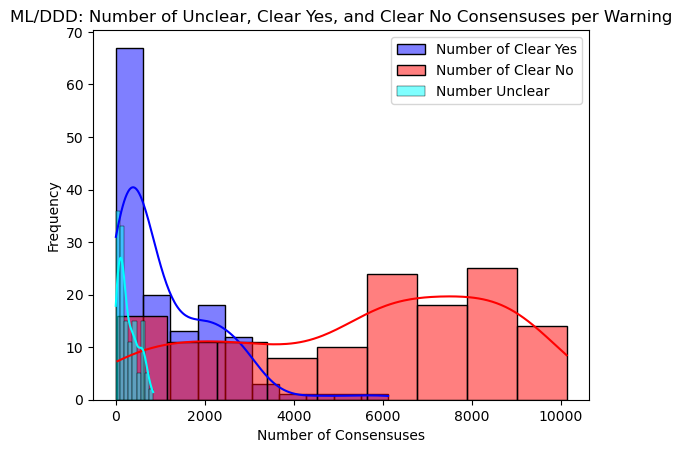

In [117]:
s1, s2, s3, s4 = sum(warning_stats["Total Works with Clear Yes"]), sum(warning_stats["Total Works with Clear No"]), sum(warning_stats["Total Works Unclear"]), sum(warning_stats["Total Works with No Votes"])
print(f"Total works marked clear yes for a warning: {s1}")
print(f"Total works marked clear no for a warning: {s2}")
print(f"Total works marked unclear for a warning: {s3}")
print(f"Total works with no votes for a warning: {s4}")

sns.histplot(data=warning_stats, x="Total Works with Clear Yes", kde=True, color='blue', label="Number of Clear Yes")
sns.histplot(data=warning_stats, x="Total Works with Clear No", kde=True, color='red', label="Number of Clear No")
sns.histplot(data=warning_stats, x="Total Works Unclear", kde=True, color='cyan', label="Number Unclear")
# sns.histplot(data=warning_stats, x="Number No Votes", kde=True, color='magenta', label="Number No Votes")

plt.xlabel('Number of Consensuses')
plt.ylabel('Frequency')
plt.title('ML/DDD: Number of Unclear, Clear Yes, and Clear No Consensuses per Warning')
plt.legend()
plt.show()

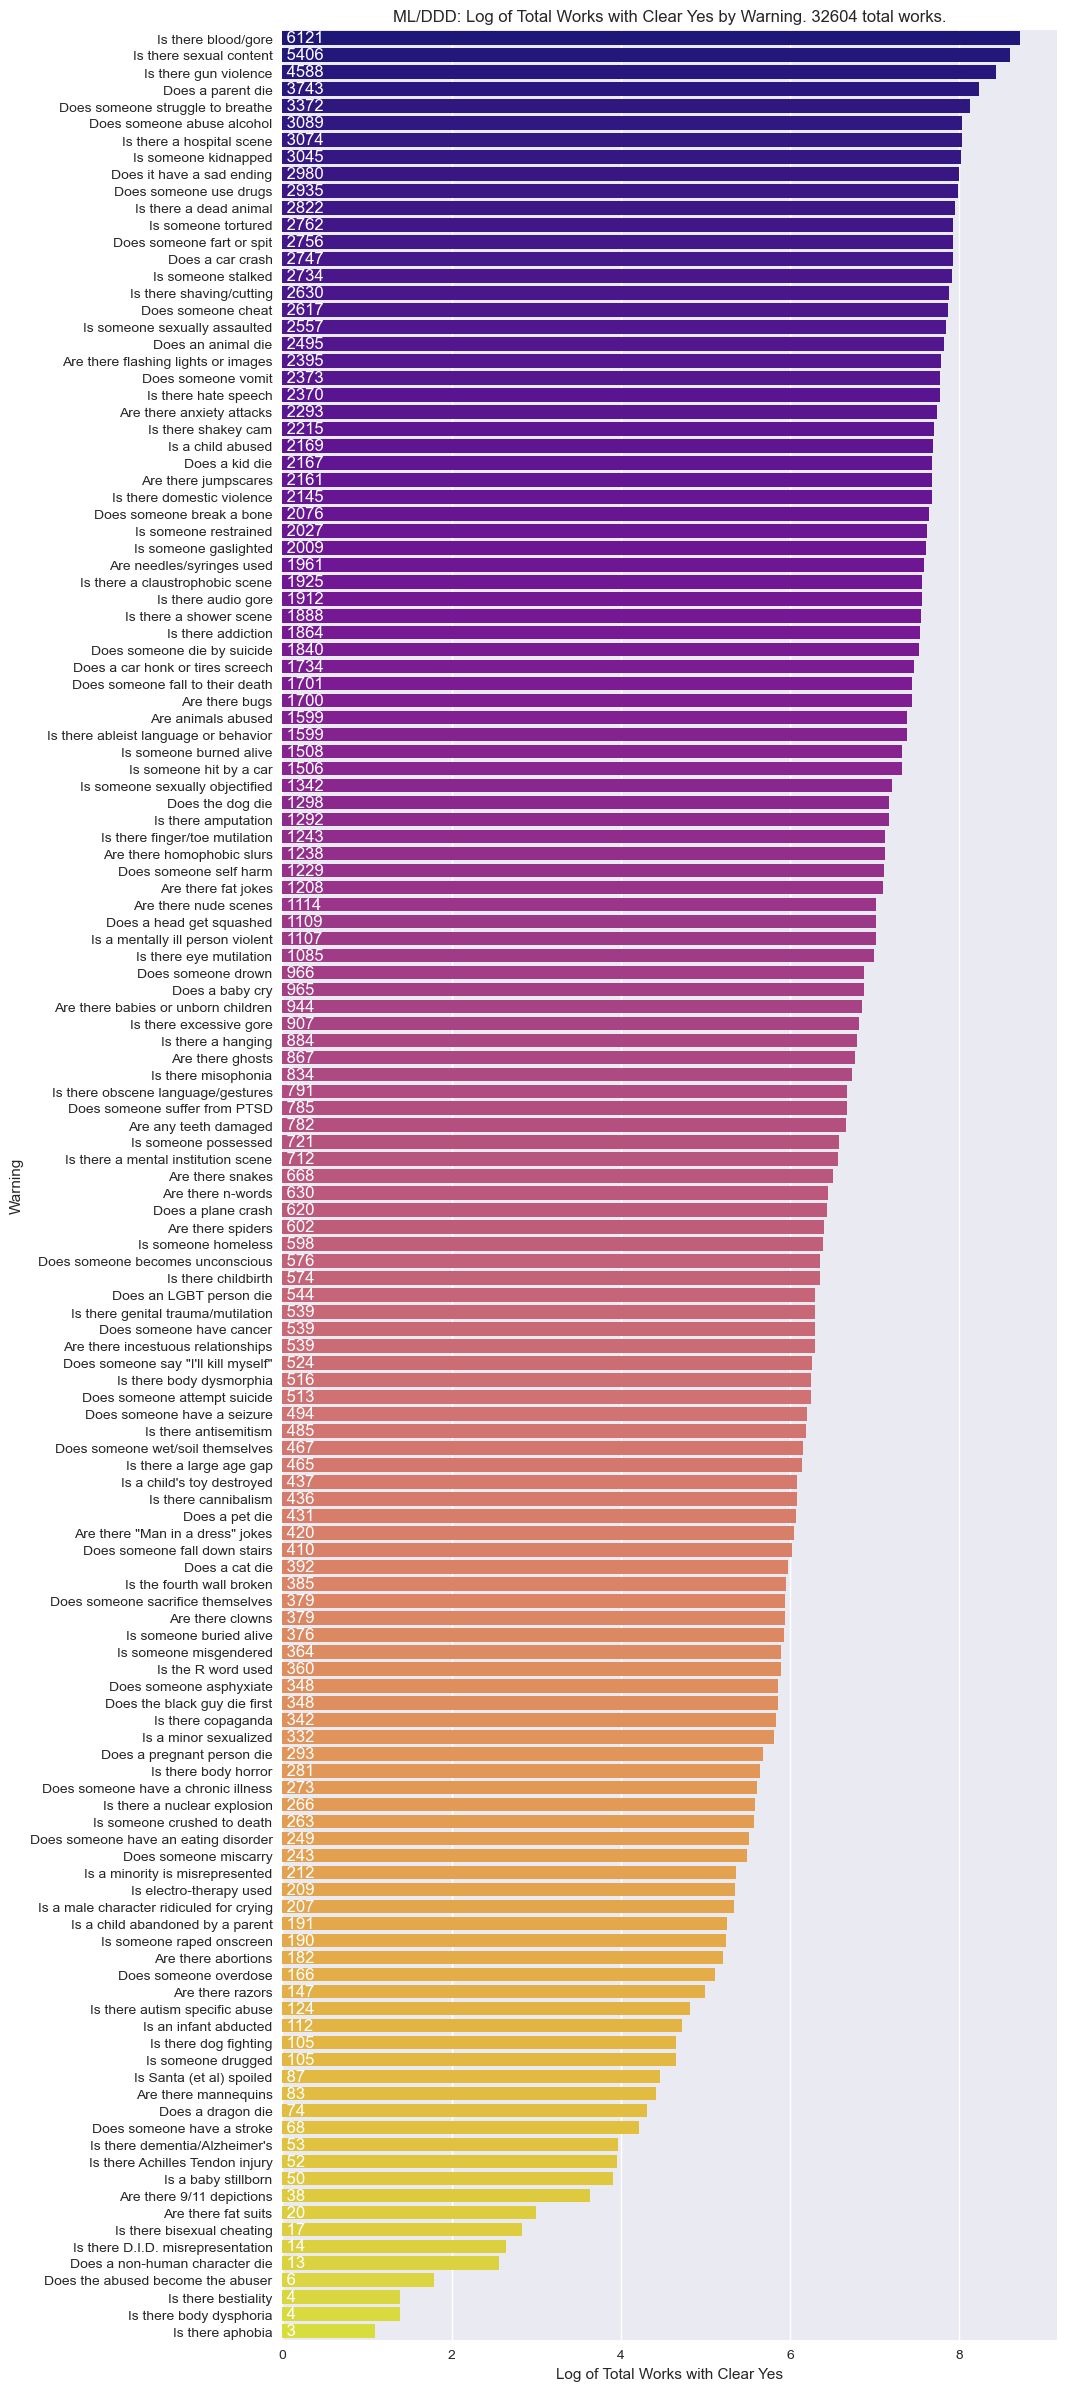

In [42]:
# Compute the log of the 'Number of Clear Yes' values
warning_stats['Log Total Works with Clear Yes'] = np.log(warning_stats['Total Works with Clear Yes'])

# Sort the DataFrame by the 'Log Number of Clear Yes' in descending order
df_sorted = warning_stats.sort_values(by='Log Total Works with Clear Yes', ascending=False)

# Create the horizontal bar plot
plt.figure(figsize=(10, 30))
barplot = sns.barplot(
    x='Log Total Works with Clear Yes', 
    y='Warning', 
    data=df_sorted, 
    palette='plasma'
)

# Annotate each bar with the original 'Number of Clear Yes' value
for index, value in enumerate(df_sorted['Total Works with Clear Yes']):
    plt.text(0, index, f' {value}', color='white', va='center', fontsize=12)

# Display the plot
plt.title(f'ML/DDD: Log of Total Works with Clear Yes by Warning. {len(sensitivity_table)} total works.')
plt.xlabel('Log of Total Works with Clear Yes')
plt.ylabel('Warning')
plt.show()

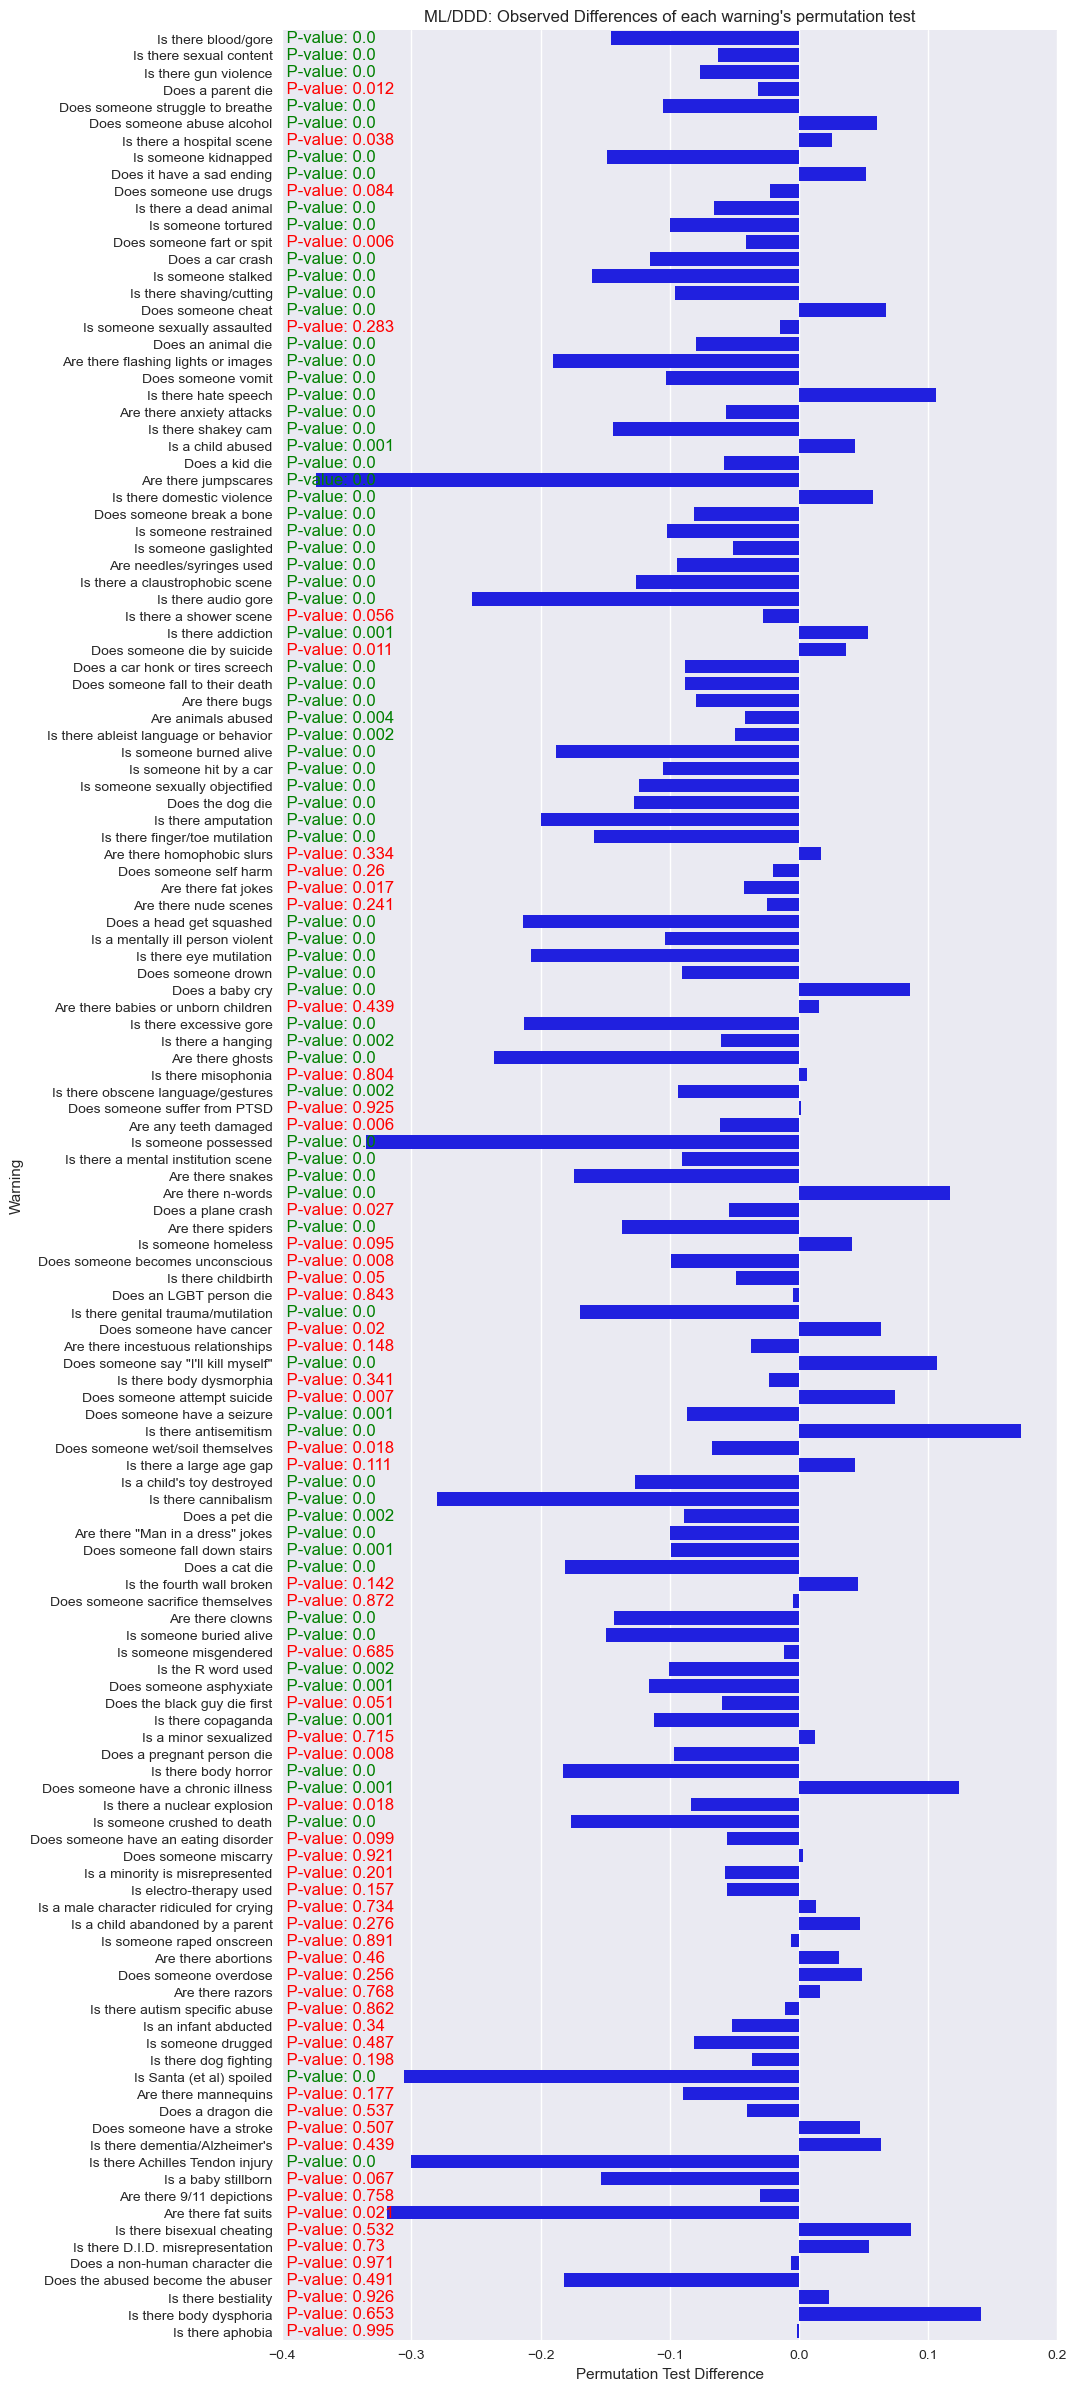

In [44]:
# The plot below shows the observed difference between the from the permutation test. A positive result indicates the average ratings
# for works marked Clear Yes for the warning are greater (more popular) than what would be expected under a null hypothesis.
# The p-value of the test is also displayed, indicating whether the difference is statistically significant (p-value < 0.005).
fig, ax = plt.subplots(figsize=(10, 30))
sns.barplot(y=warning_stats["Warning"], x=warning_stats["Permutation Test Difference"], color="blue", ax=ax)
plt.title("ML/DDD: Observed Differences of each warning's permutation test")
plt.xlim(-0.4, 0.2)

for index, value in enumerate(df_sorted['Permutation Test P-Value']):
    color = 'green' if value < 0.005 else 'red'
    plt.text(-0.4, index, f' P-value: {value}', color=color, va='center', fontsize=12)

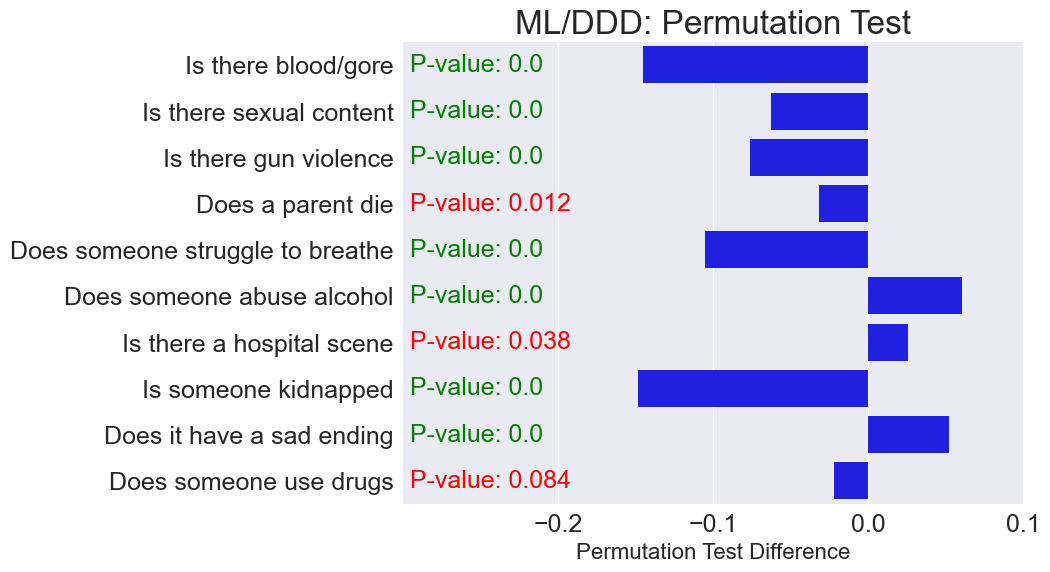

In [133]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(y=warning_stats["Warning"].head(10), x=warning_stats["Permutation Test Difference"].head(10), color="blue", ax=ax)
ax.set_title("ML/DDD: Permutation Test", fontsize=24)
ax.set_xlim(-0.3, 0.1)
ax.set_xticks([-0.2, -0.1, 0, 0.1])
ax.set_xlabel(xlabel="Permutation Test Difference", fontsize=16)
ax.set_ylabel(ylabel="")
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)

for index, value in enumerate(df_sorted['Permutation Test P-Value'].head(10)):
    color = 'green' if value < 0.005 else 'red'
    ax.text(-0.3, index, f' P-value: {value}', color=color, va='center', fontsize=18)

/Users/ameliakovacs/anaconda3/envs/surprise/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ameliakovacs/anaconda3/envs/surprise/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


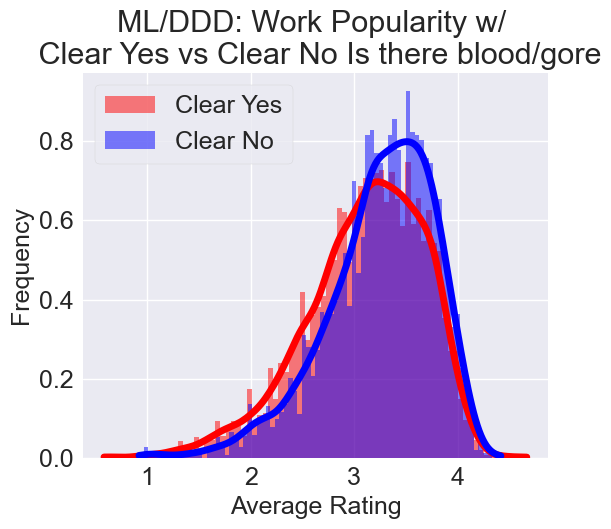

<Figure size 800x550 with 0 Axes>

In [134]:
fig, ax = plt.subplots(figsize=(6,5))
warning = "Is there blood/gore"
sns.histplot(data=sensitivity_table[sensitivity_table[f"Clear Yes: {warning}"] == 1]['av_rating'], bins=80, kde=True, line_kws={'lw':5}, stat='density', color='red', edgecolor="none", label=f'Clear Yes', alpha=0.5, ax=ax)
sns.histplot(data=sensitivity_table[sensitivity_table[f"Clear No: {warning}"] == 1]['av_rating'], bins=80, kde=True, line_kws={'lw':5}, stat='density', color='blue', edgecolor="none", label=f'Clear No', alpha=0.5, ax=ax)

ax.set_xlabel('Average Rating', fontsize=18)
ax.set_ylabel('Frequency', fontsize=18)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.set_title(f'ML/DDD: Work Popularity w/ \n Clear Yes vs Clear No {warning}', fontsize=22)
ax.legend(frameon=True, fontsize=18, loc='best')
plt.show()

/Users/ameliakovacs/anaconda3/envs/surprise/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ameliakovacs/anaconda3/envs/surprise/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


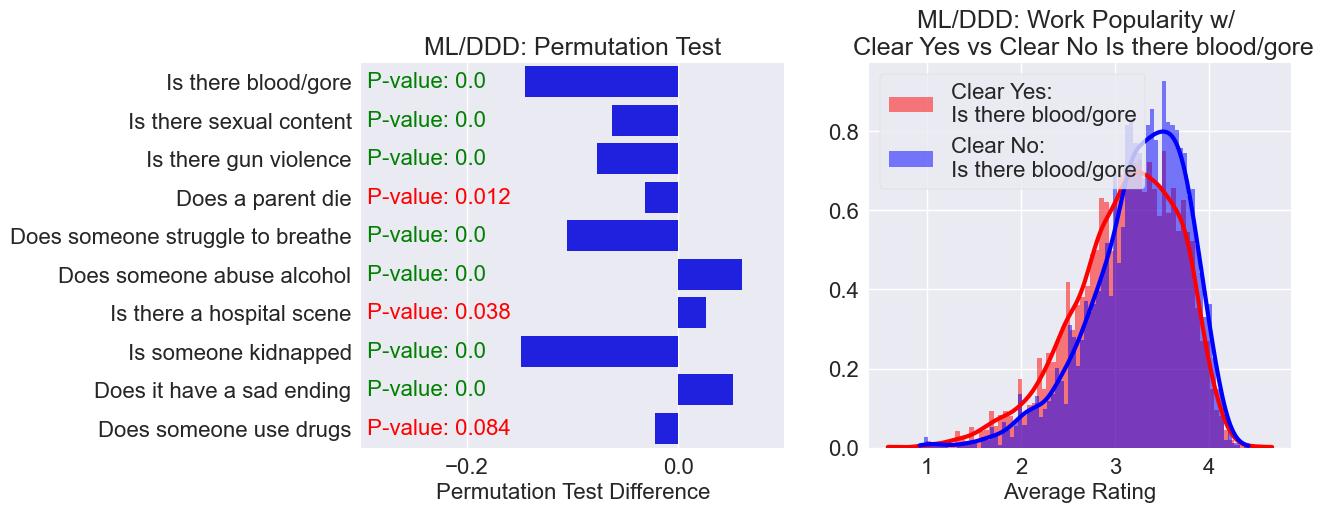

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.barplot(y=warning_stats["Warning"].head(10), x=warning_stats["Permutation Test Difference"].head(10), color="blue", ax=axes[0])
axes[0].set_title("ML/DDD: Permutation Test", fontsize=18)
axes[0].set_xlim(-0.3, 0.1)
axes[0].set_xticks([-0.2, 0])
axes[0].set_xlabel(xlabel="Permutation Test Difference", fontsize=16)
axes[0].set_ylabel(ylabel="")
axes[0].tick_params(axis='x', labelsize=16)
axes[0].tick_params(axis='y', labelsize=16)

for index, value in enumerate(df_sorted['Permutation Test P-Value'].head(10)):
    color = 'green' if value < 0.005 else 'red'
    axes[0].text(-0.3, index, f' P-value: {value}', color=color, va='center')

warning = "Is there blood/gore"
sns.histplot(data=sensitivity_table[sensitivity_table[f"Clear Yes: {warning}"] == 1]['av_rating'], bins=80, kde=True, line_kws={'lw':3}, stat='density', color='red', edgecolor="none", label=f'Clear Yes: \n{warning}', alpha=0.5, ax=axes[1])
sns.histplot(data=sensitivity_table[sensitivity_table[f"Clear No: {warning}"] == 1]['av_rating'], bins=80, kde=True, line_kws={'lw':3}, stat='density', color='blue', edgecolor="none", label=f'Clear No: \n{warning}', alpha=0.5, ax=axes[1])

axes[1].set_xlabel('Average Rating', fontsize=16)
axes[1].set_ylabel('')
axes[1].tick_params(axis='x', labelsize=16)
axes[1].tick_params(axis='y', labelsize=16)
axes[1].set_title(f'ML/DDD: Work Popularity w/ \n Clear Yes vs Clear No {warning}', fontsize=18)
axes[1].legend(frameon=True, fontsize=16, loc="upper left")
plt.show()

/Users/ameliakovacs/anaconda3/envs/surprise/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ameliakovacs/anaconda3/envs/surprise/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


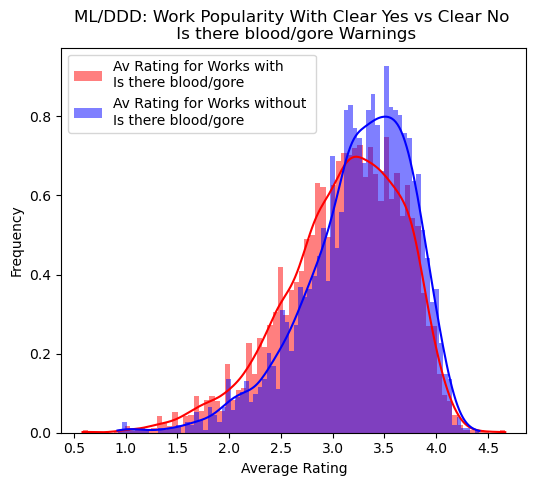

/Users/ameliakovacs/anaconda3/envs/surprise/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ameliakovacs/anaconda3/envs/surprise/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


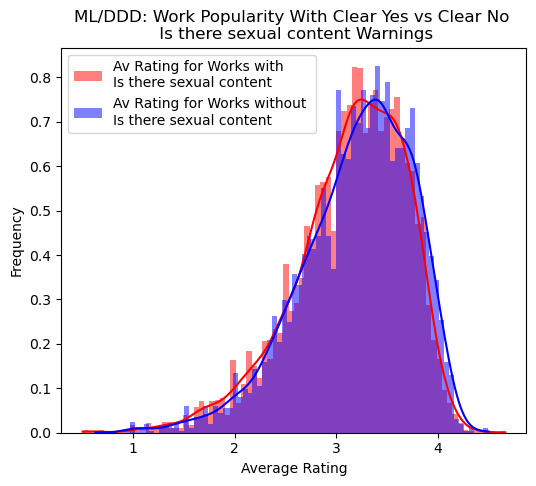

/Users/ameliakovacs/anaconda3/envs/surprise/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ameliakovacs/anaconda3/envs/surprise/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


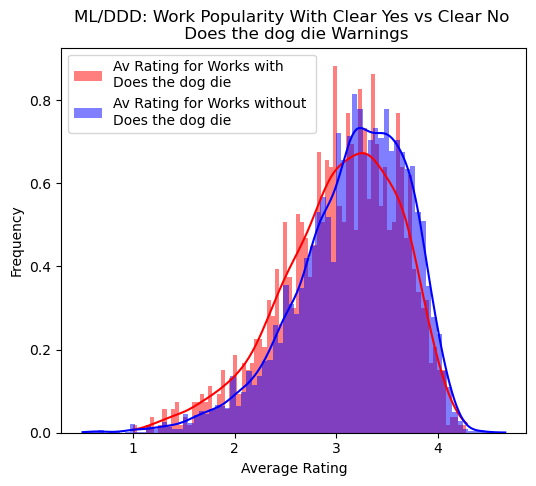

/Users/ameliakovacs/anaconda3/envs/surprise/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ameliakovacs/anaconda3/envs/surprise/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


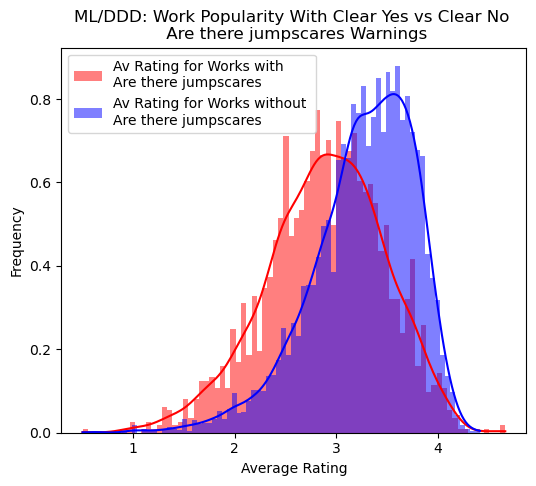

In [131]:
# We can plot histograms to visualize the distributions for warnings of interest
warning_popularity_distribution("Is there blood/gore")
warning_popularity_distribution("Is there sexual content")
warning_popularity_distribution("Does the dog die")
warning_popularity_distribution("Are there jumpscares")

### User-Centric Warning Analysis

In [63]:
# Choose 1000 random users to perform the analysis on
np.random.seed(42)
random_users = np.random.choice(interaction_table['user_id'].unique(), 1000, replace=False)

In [64]:
# Filter interaction_table to keep only data for the randomly selected users
interaction_table_sampled = interaction_table[interaction_table['user_id'].isin(random_users)]

# Calculate the average rating for each user across all works
user_avg_rating_all = interaction_table_sampled.groupby('user_id')['rating'].mean().reset_index()

def calculate_interaction_table(user_id):
    user_data = pd.merge(interaction_table_sampled[interaction_table_sampled['user_id'] == user_id], sensitivity_table, on='work_id')
    overall_avg_rating = user_data['rating'].mean()
    total_interactions = len(user_data)
    
    user_result = {'user_id': user_id, 'Overall Avg Rating': overall_avg_rating, "Total Interactions": total_interactions}
    
    for warning in warnings:
        user_result[f"Interactions with {warning}"] = len(user_data[user_data[f"Clear Yes: {warning}"] == 1])
        user_result[f"Avg Rating with {warning}"] = user_data[user_data[f"Clear Yes: {warning}"] == 1]['rating'].mean()
        user_result[f"Avg Rating without {warning}"] = user_data[user_data[f"Clear No: {warning}"] == 1]['rating'].mean()
        
    return user_result

# Calculate the average rating for works with and without each warning for a given user
results_data = user_avg_rating_all['user_id'].apply(calculate_interaction_table)
results_df = pd.DataFrame(results_data.tolist())
results_df

,user_id,Overall Avg Rating,Total Interactions,Interactions with Does the dog die,Avg Rating with Does the dog die,Avg Rating without Does the dog die,Interactions with Are animals abused,Avg Rating with Are animals abused,Avg Rating without Are animals abused,Interactions with Does a pet die,...,Avg Rating without Is there gun violence,Interactions with Is there a nuclear explosion,Avg Rating with Is there a nuclear explosion,Avg Rating without Is there a nuclear explosion,Interactions with Is there blood/gore,Avg Rating with Is there blood/gore,Avg Rating without Is there blood/gore,Interactions with Does someone drown,Avg Rating with Does someone drown,Avg Rating without Does someone drown
0,90,3.766667,30,2,3.500000,3.750000,3,3.666667,3.764706,2,...,3.833333,3,4.000000,3.722222,11,3.727273,4.000000,1,3.000000,3.850000
1,420,3.800000,80,3,4.000000,3.757576,8,3.750000,3.766667,1,...,3.913043,3,2.666667,3.826087,50,3.840000,3.800000,10,3.800000,3.816667
2,477,3.761726,533,36,3.722222,3.789976,78,3.711538,3.823009,23,...,3.745283,20,3.450000,3.843023,299,3.896321,3.591603,65,3.884615,3.817568
3,492,3.100000,20,4,2.875000,3.166667,0,NaN,3.222222,2,...,3.250000,1,3.000000,3.105263,14,3.035714,3.375000,0,NaN,3.117647
4,517,3.257143,35,4,3.250000,3.240741,7,3.357143,3.354167,3,...,3.714286,1,3.500000,3.227273,26,3.019231,4.375000,2,2.000000,3.322581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,161593,3.513158,76,3,3.666667,3.444444,10,3.300000,3.490196,2,...,3.454545,4,3.750000,3.442623,31,3.451613,3.483871,2,4.500000,3.457627
996,161730,4.280374,107,11,4.090909,4.351190,18,4.277778,4.324675,7,...,4.300000,3,3.166667,4.338384,73,4.294521,4.229167,12,4.125000,4.272727
997,161839,3.664557,237,22,3.750000,3.668367,41,3.792683,3.641176,16,...,3.831250,6,2.333333,3.716518,169,3.662722,3.650000,32,3.421875,3.696809
998,162287,3.299213,254,12,3.833333,3.277523,45,3.244444,3.286145,12,...,3.378049,6,2.583333,3.337838,119,3.357143,3.348958,17,3.147059,3.337438


In [125]:
def plot_rating_scatter(warning):
    percent_greater = len(results_df[results_df[f"Avg Rating with {warning}"] > results_df[f"Avg Rating without {warning}"]])/len(results_df)
    print(f"Percent of works below red line: {percent_greater:2f}")

    fig, ax = plt.subplots()
    ax.plot([0, 1], [0, 1], color='red', transform=ax.transAxes)
    sns.scatterplot(x=results_df[f"Avg Rating with {warning}"], y=results_df[f"Avg Rating without {warning}"], color="royalblue", s=25)
    plt.title(f"ML/DDD: Average Rating per user \nw/ and w/o {warning}", fontsize=22)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.ylabel(f"Avg Rating w/ {warning}", fontsize=18)
    plt.xlabel(f"Avg Rating w/o {warning}", fontsize=18)
    plt.show()

Percent of works below red line: 0.573000


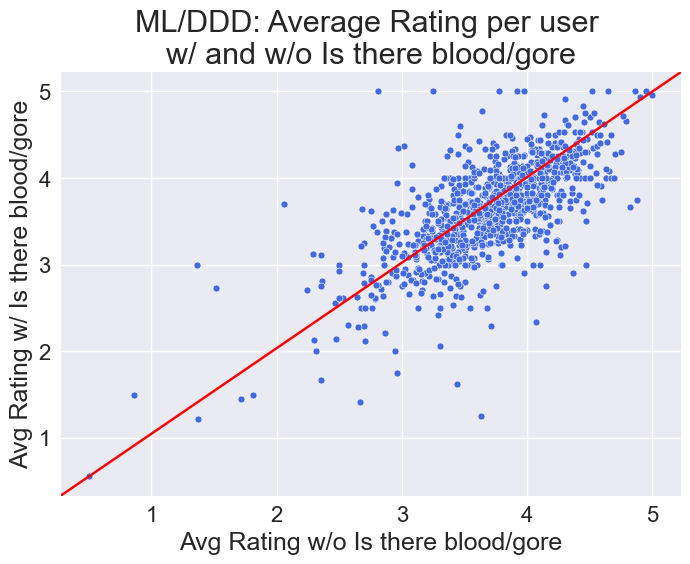

Percent of works below red line: 0.548000


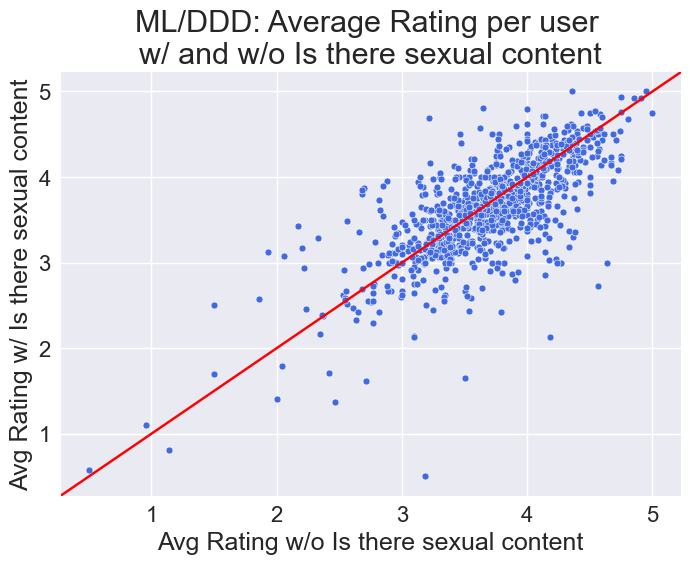

Percent of works below red line: 0.672000


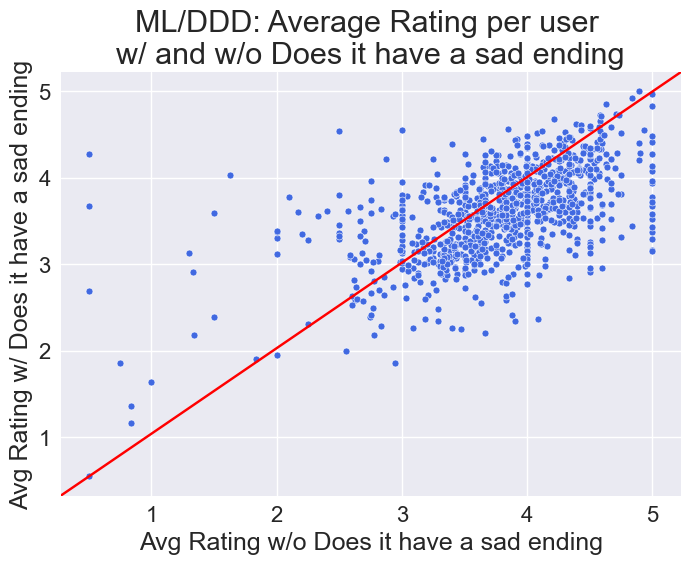

Percent of works below red line: 0.464000


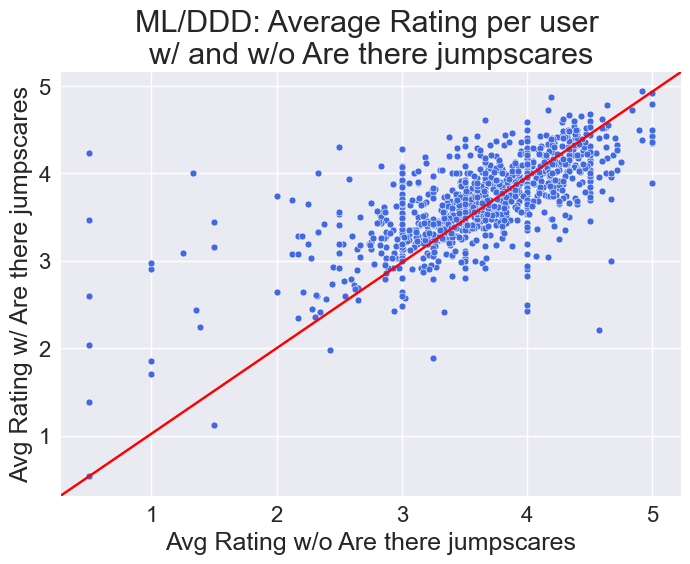

In [126]:
plot_rating_scatter("Is there blood/gore")
plot_rating_scatter("Is there sexual content")
plot_rating_scatter("Does it have a sad ending")
plot_rating_scatter("Are there jumpscares")

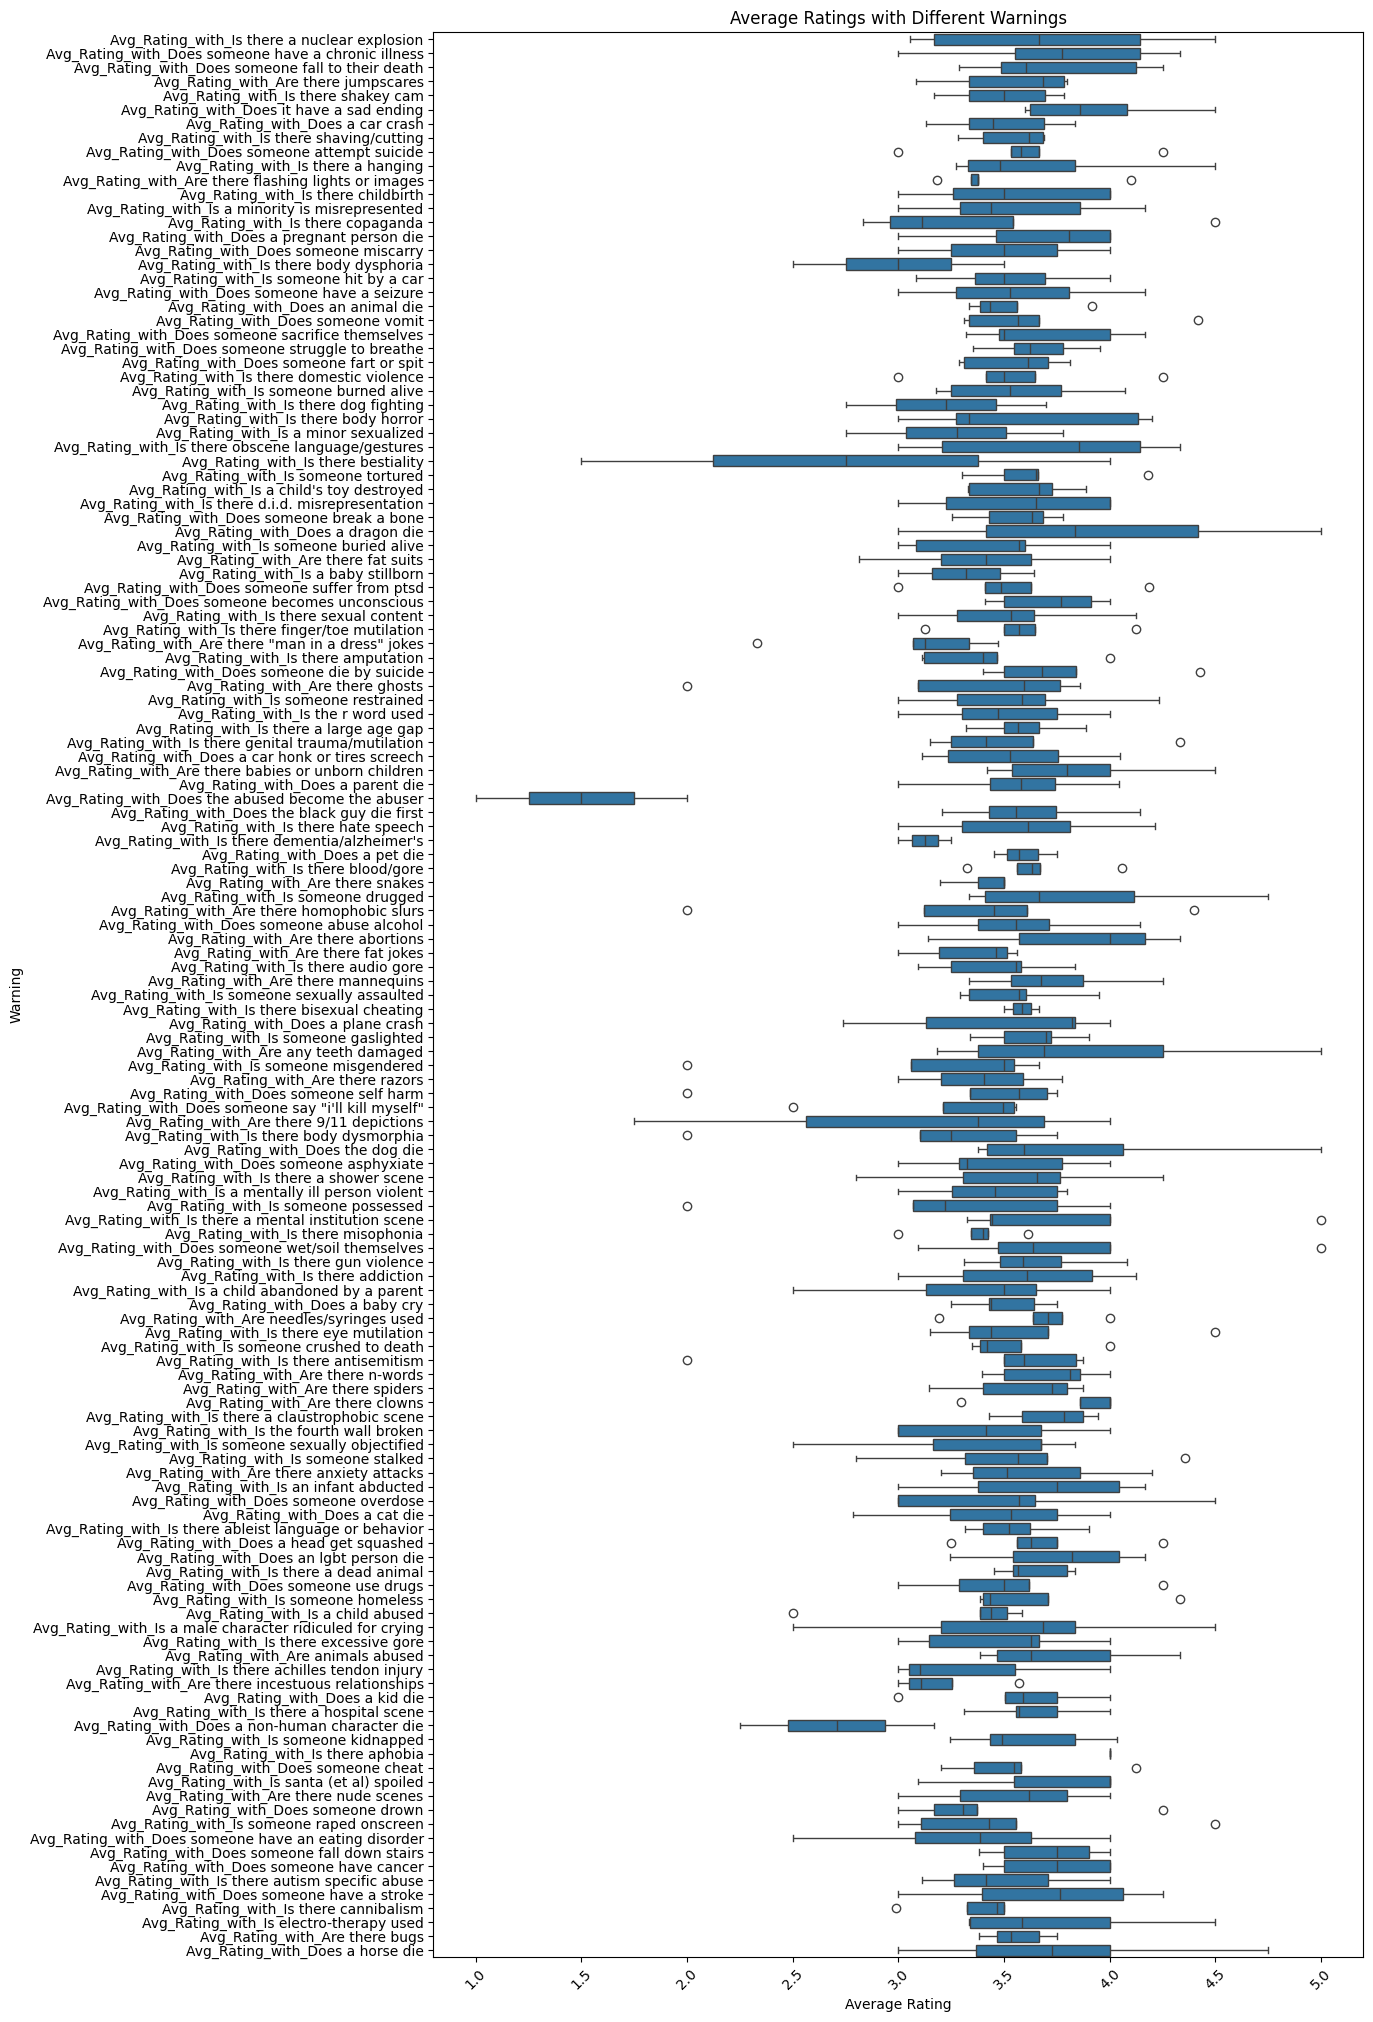

In [41]:
# Melt the DataFrame to reshape it for plotting
melted_results = pd.melt(results_df.head(), id_vars=['User_ID', 'Overall_Avg_Rating'], 
                          var_name='Warning', value_name='Average_Rating')

# Plotting
plt.figure(figsize=(12, 25))
sns.boxplot(x='Average_Rating', y='Warning', data=melted_results)
plt.title('Average Ratings with Different Warnings')
plt.ylabel('Warning')
plt.xlabel('Average Rating')
plt.xticks(rotation=45)
plt.show()